In [196]:
#Importacion de los datos 
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import statsmodels.api as sm

# Importação de funções

In [197]:
#Exportacion de los Datos desde el Excel 
df = pd.read_excel("cherume_total.xlsx")
df["DATA"] = pd.to_datetime(df["DATA"])
print(df)
type(df)

          DATA      MÊS   ANO  PLUVIOMETRIA  vazao
0   2022-01-01  janeiro  2022           0.4    927
1   2022-01-02  janeiro  2022           0.2    780
2   2022-01-03  janeiro  2022           0.2    739
3   2022-01-04  janeiro  2022          42.8    913
4   2022-01-05  janeiro  2022          28.0   1200
..         ...      ...   ...           ...    ...
480 2023-04-26    abril  2023           3.8   1698
481 2023-04-27    abril  2023           0.3   1757
482 2023-04-28    abril  2023           0.7   1693
483 2023-04-29    abril  2023           0.0   1750
484 2023-04-30    abril  2023           0.8   1715

[485 rows x 5 columns]


pandas.core.frame.DataFrame

In [198]:
# Calcular la media de la serie de tiempo completa (columna "Caudal")
media_caudal = df["vazao"].mean()
# Calcula la desviación estándar
desviacion_estandar = df["vazao"].std()
media_caudal_diaria=(media_caudal/24)
print("La media es diaria (m3/dia):",media_caudal)
print("La media es (m3/h)",media_caudal_diaria)
print("la desviacion estandar es:",desviacion_estandar)

La media es diaria (m3/dia): 1285.498969072165
La media es (m3/h) 53.56245704467354
la desviacion estandar es: 507.6276968553208


In [199]:
# Filtrar los datos para un día específico (por ejemplo, el primer día)
dia_accidente= df[df["DATA"] == "2022-06-21"]
vazao_dia_especifico = dia_accidente["vazao"].values[0]
print("numero",dia_accidente)

numero           DATA    MÊS   ANO  PLUVIOMETRIA  vazao
171 2022-06-21  junho  2022           0.0    924


In [200]:
# Calcular una media desde el inicio hasta un limite 
indice_limite_antes = 173  
media_hasta_limite = (df.loc[:indice_limite_antes, "vazao"].mean())
print("Média antes do acidente", indice_limite_antes, ":", media_hasta_limite)

Média antes do acidente 173 : 921.6034482758621


In [201]:
#Calcular una media para un intervalo dado  
indice_inicio = 173  
media_desde_inicio = (df.loc[indice_inicio:, "vazao"].mean())
print("Média após o acidente", indice_inicio, "hasta el final:", media_desde_inicio)

Média após o acidente 173 hasta el final: 1487.7083333333333


# Análise de vazão: de forma global

*Ao realizar uma análise de vazão em uma série temporal, você geralmente examina padrões, tendências e variações nos dados de vazão ao longo de períodos consecutivos. Isso pode envolver a utilização de métodos estatísticos, técnicas de séries temporais e ferramentas de visualização para entender melhor o comportamento da vazão, identificar sazonalidades, eventos extremos, mudanças de longo prazo, entre outros aspectos.*

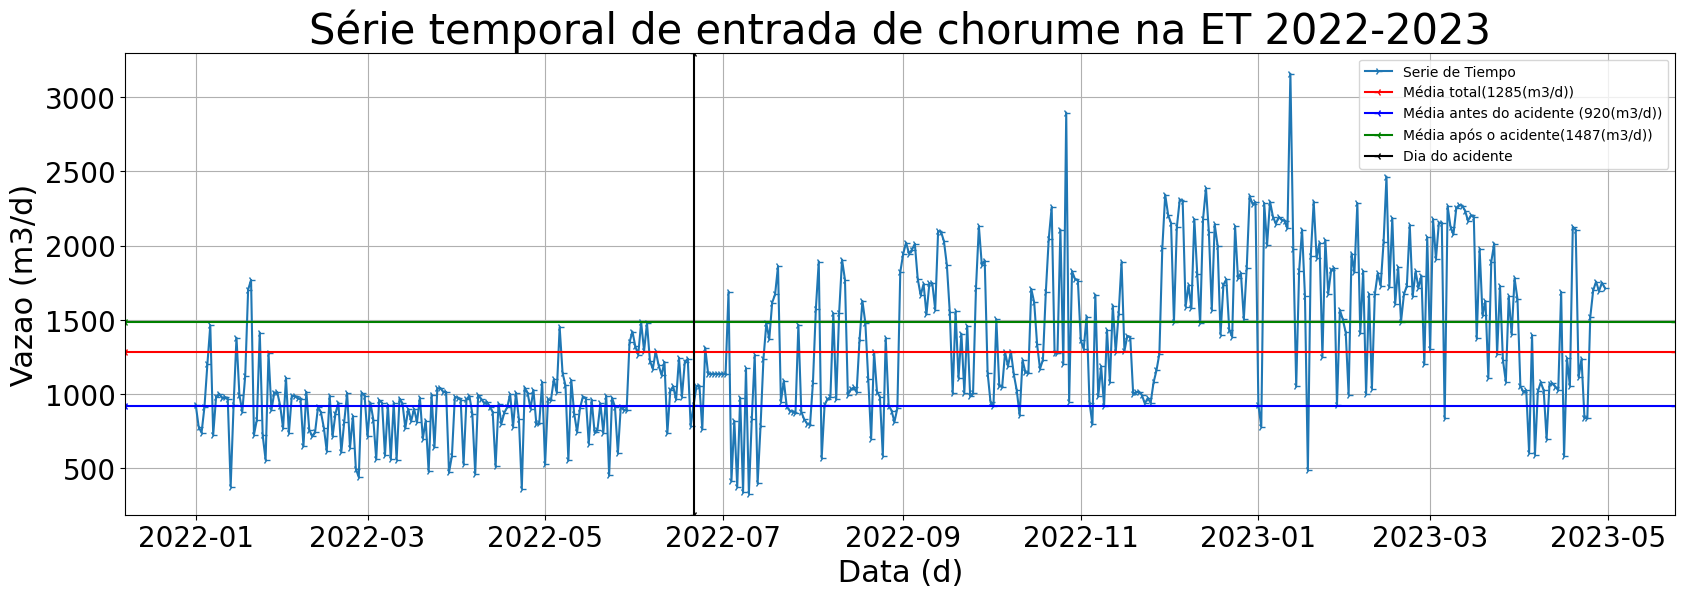

In [202]:
# Definir el tamanho del grafico
plt.figure(figsize=(20, 6))
# Graficar la serie de tiempo completa
plt.plot(df["DATA"], df["vazao"], marker='4', linestyle='-', label="Serie de Tiempo")
# Cambiar el tamaño de la letra en los ejes
plt.tick_params(axis='x', labelsize=20)  # Tamaño de letra para el eje X
plt.tick_params(axis='y', labelsize=20)  # Tamaño de letra para el eje Y
# Anadir las variables del sistema 
plt.axhline(y=media_caudal, color='r',marker='3', linestyle='-', label="Média total(1285(m3/d))")
plt.axhline(y=media_hasta_limite, color='b',marker='3', linestyle='-', label="Média antes do acidente (920(m3/d))")
plt.axhline(y=media_desde_inicio, color='g',marker='3', linestyle='-', label="Média após o acidente(1487(m3/d))")
#plt.axhline(y=1000, color='Orange',marker='3', linestyle='-', label="Projeção planta projecto Executivo-ESTRE Maio de 2020 1000-(m3/d)")
plt.axvline(x=dia_accidente["DATA"].values[0],marker='3',color='k', linestyle='-', label="Dia do acidente")
plt.xlabel(" Data (d) ", fontsize=22)  # Aumentar el tamaño de la letra en el eje X
plt.ylabel(" Vazao (m3/d) ", fontsize=22)  # Aumentar el tamaño de la letra en el eje Y
plt.title("Série temporal de entrada de chorume na ET 2022-2023", fontsize=30)  # Aumentar el tamaño de la letra en el título
plt.legend()
plt.grid(True)
plt.show()

# Analisis pluviometria

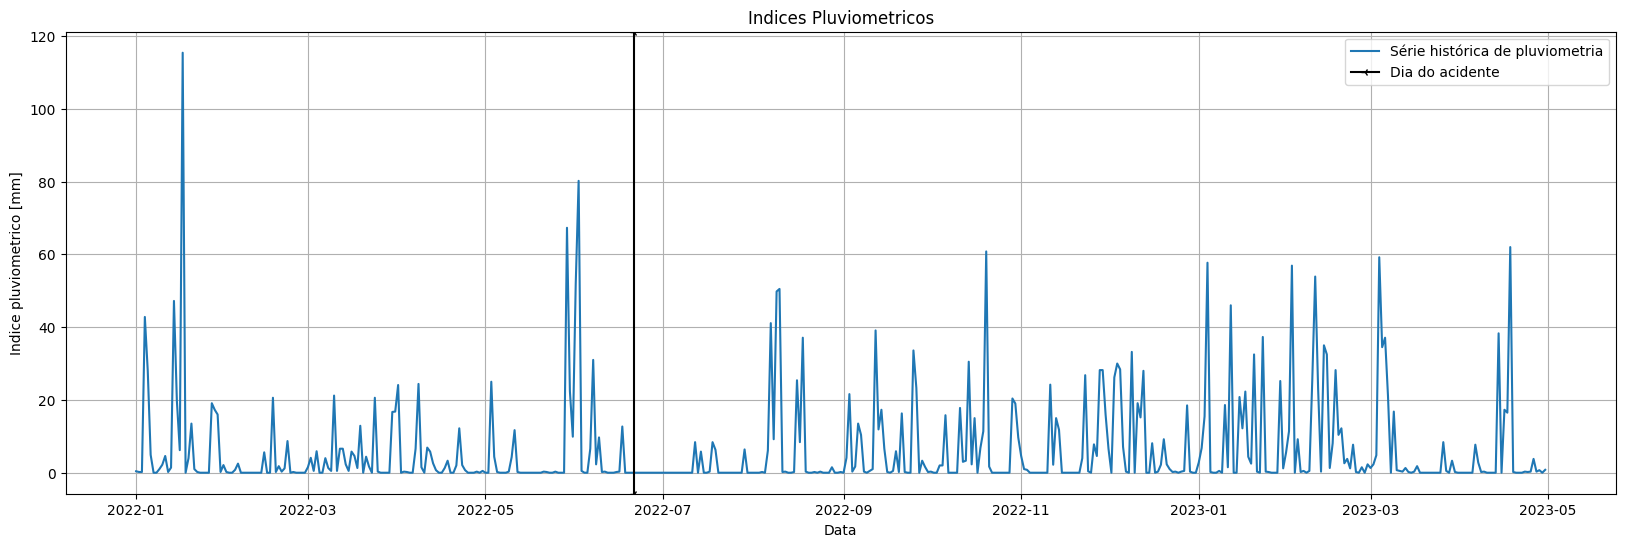

In [203]:
# Indices pluviometricos enf uncion de los datos dados 
plt.figure(figsize=(20, 6))
plt.plot(df["DATA"],df["PLUVIOMETRIA"], linestyle='-', label="Série histórica de pluviometria")
plt.xlabel("Data")
plt.ylabel("Indice pluviometrico [mm]")
plt.title("Indices Pluviometricos")
plt.axvline(x=dia_accidente["DATA"].values[0],marker='3',color='k', linestyle='-', label="Dia do acidente")
plt.legend()
plt.grid(True)
plt.show()

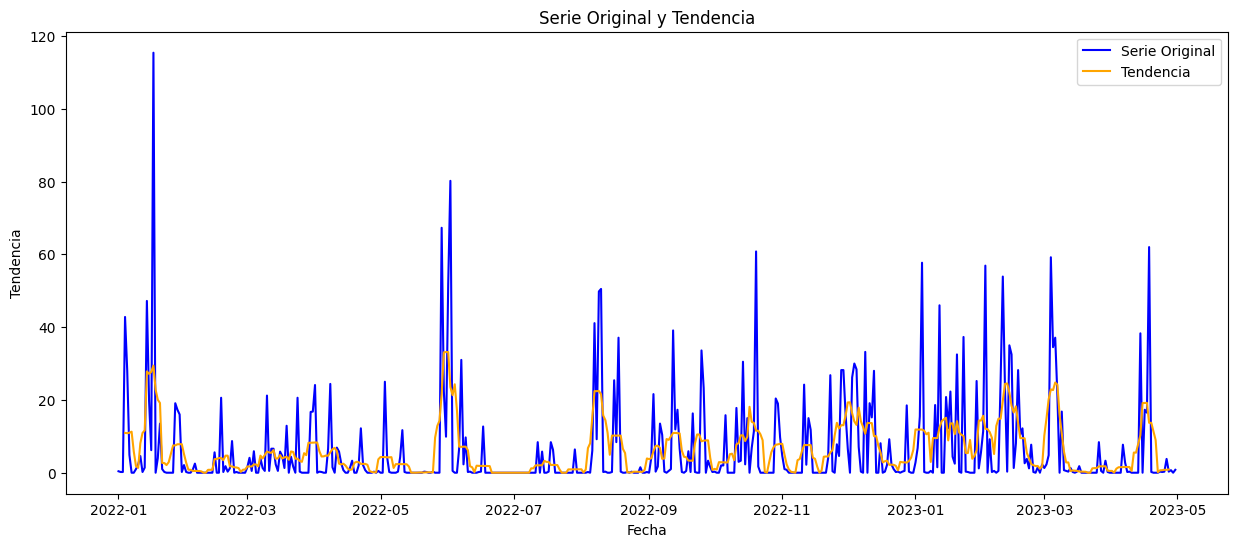

In [204]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'DATA' es tu columna de fechas
df['DATA'] = pd.to_datetime(df['DATA'])

# Establecer 'DATA' como el índice
df.set_index('DATA', inplace=True)

# Asegurarse de que el índice esté ordenado
df.sort_index(inplace=True)

# Descomposición de la serie temporal
decomposition = sm.tsa.seasonal_decompose(df['PLUVIOMETRIA'], model='additive')

# Extraer los componentes
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Crear un solo gráfico para la serie original y la tendencia
fig, ax = plt.subplots(figsize=(15, 6))

# Gráfico de la serie original
ax.plot(df['PLUVIOMETRIA'], label='Serie Original', color='blue')
ax.set_ylabel('PLUVIOMETRIA')
ax.legend()

# Gráfico de la tendencia
ax.plot(tendencia, label='Tendencia', color='orange')
ax.set_ylabel('Tendencia')
ax.legend()

# Ajustes adicionales
plt.xlabel('Fecha')
plt.title('Serie Original y Tendencia')
plt.show()



# Vazao de cherume

In [205]:
##### Media movil #################
df["media_movil_diaria"] = df["vazao"].rolling(window=60, min_periods=5).mean()
#print(df)
media_movil_diaria_columna = df["media_movil_diaria"]
media_movil_diaria_lista = df["media_movil_diaria"].tolist()
lista_tiempo = list(range(len(media_movil_diaria_lista)))
#print(lista_tiempo)
#print(media_movil_diaria_lista)

In [206]:
# Crear un mapeo para cambiar los nombres de los meses
nombres_meses = {
    1: "Enero",
    2: "Febrero",
    3: "Marzo",
    4: "Abril",
    5: "Mayo",
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    9: "Septiembre",
    10: "Octubre",
    11: "Noviembre",
    12: "Diciembre",
}
# Cambiar el índice para mostrar los nombres de los meses
media_mensual.index = media_mensual.index.month.map(nombres_meses)
# Graficar la media mensual
plt.figure(figsize=(20, 6))
media_mensual.plot(kind="bar")
plt.xlabel("Mes")
plt.ylabel("Media Mensual 2022-2023")
plt.title("Media Mensual de Caudal")
plt.show()
#print(media_mensual)

AttributeError: 'Index' object has no attribute 'month'

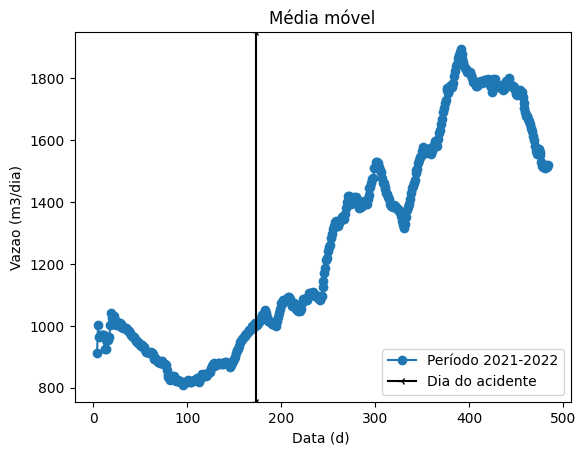

In [ ]:

# Crear un gráfico con líneas que conectan los puntos
plt.plot(lista_tiempo,media_movil_diaria_lista, marker='o', linestyle='-', label="Período 2021-2022")
# Etiquetas y título
plt.ylabel("Vazao (m3/dia)")
plt.xlabel("Data (d) ")
plt.title("Média móvel")
plt.axvline(x=173,marker='3',color='k', linestyle='-', label="Dia do acidente")
# Mostrar leyenda
plt.legend()
# Mostrar el gráfico
plt.show()
# Convertir los datos de coma a punto decimal
def convert_comma_to_point(value):
    try:
        return float(value.replace(',', '.'))
    except:
        return value
#print(df)

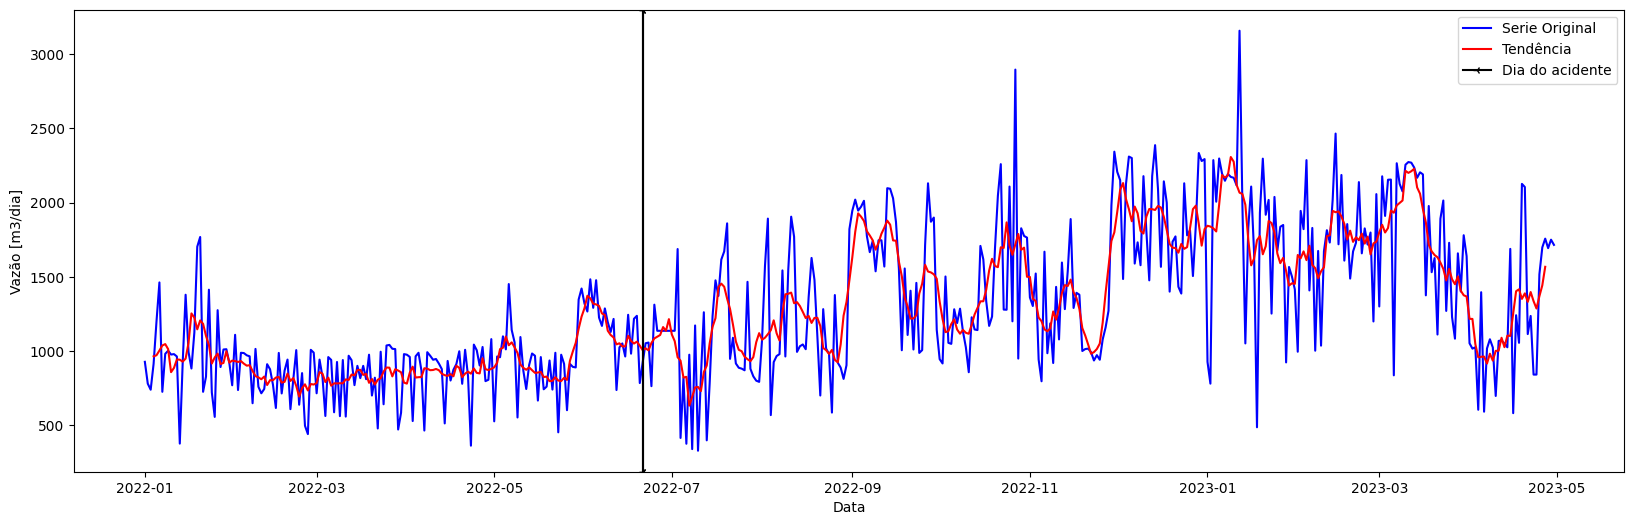

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['vazao'], model='additive')
# Extrae los componentes
######
tendencia = decomposition.trend
#########
estacionalidad = decomposition.seasonal
###########
residuo = decomposition.resid
# Crear una figura y ejes para un único gráfico
fig, ax = plt.subplots(figsize=(20, 6))
# Primer gráfico
ax.plot(df['vazao'], label='Serie Original', color='blue')
ax.axvline(x=dia_accidente["DATA"].values[0], marker='3', color='k', linestyle='-')
ax.legend(loc='upper left')
# Segundo gráfico
ax.plot(tendencia, label='Tendência', color='red')  # Ajusta el color según sea necesario
ax.axvline(x=dia_accidente["DATA"].values[0], marker='3', color='k', linestyle='-', label="Dia do acidente")
ax.legend(loc='upper right')  # Puedes ajustar la ubicación de la leyenda según sea necesario
# Ajustes adicionales
plt.xlabel('Data')
plt.ylabel('Vazão [m3/dia]')  # Ajusta el nombre del eje y según sea necesario
plt.show()


# Estimacion diaria (prediccion)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import math
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df_original = pd.read_excel("cherume_total.xlsx")
df_nuevo = df_original[['DATA', 'vazao']].copy()
df_nuevo["DATA"] = pd.to_datetime(df_nuevo["DATA"])
print(df_nuevo)

          DATA  vazao
0   2022-01-01    927
1   2022-01-02    780
2   2022-01-03    739
3   2022-01-04    913
4   2022-01-05   1200
..         ...    ...
480 2023-04-26   1698
481 2023-04-27   1757
482 2023-04-28   1693
483 2023-04-29   1750
484 2023-04-30   1715

[485 rows x 2 columns]


In [ ]:
data=df_nuevo.set_index('DATA')

In [ ]:
dataset = data.values
training_data_len = math.ceil(len(dataset) * .90)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

 
train_data = scaled_data[0:training_data_len, :]


x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
  

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
tf.keras.callbacks.EarlyStopping(
    'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Model
model =Sequential() 
model.add(LSTM(200, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(150, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics =["accuracy"])
model.fit(x_train,y_train,epochs=100,validation_split=0.1,callbacks=[es_callback])

test_data=scaled_data[training_data_len - 60:,:]
x_test= []
y_test= dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
x_test =np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

Epoch 1/100
11/11 [==============================] - 7s 245ms/step - loss: 0.0501 - accuracy: 0.0059 - val_loss: 0.0410 - val_accuracy: 0.0000e+00
Epoch 2/100
11/11 [==============================] - 1s 122ms/step - loss: 0.0211 - accuracy: 0.0059 - val_loss: 0.0245 - val_accuracy: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 1s 114ms/step - loss: 0.0194 - accuracy: 0.0059 - val_loss: 0.0258 - val_accuracy: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 1s 114ms/step - loss: 0.0197 - accuracy: 0.0059 - val_loss: 0.0252 - val_accuracy: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 1s 124ms/step - loss: 0.0188 - accuracy: 0.0059 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 6/100
11/11 [==============================] - 2s 176ms/step - loss: 0.0191 - accuracy: 0.0059 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 7/100
11/11 [==============================] - 2s 175ms/step - loss: 0.0188 - accuracy: 0.0029 - val_loss: 0.026

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(r2_score(y_test, predictions))

2/2 [==============================] - 1s 34ms/step
0.11023941319612329


C:\Users\felip\AppData\Local\Temp\ipykernel_27796\3109652876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['DATA']= predictions


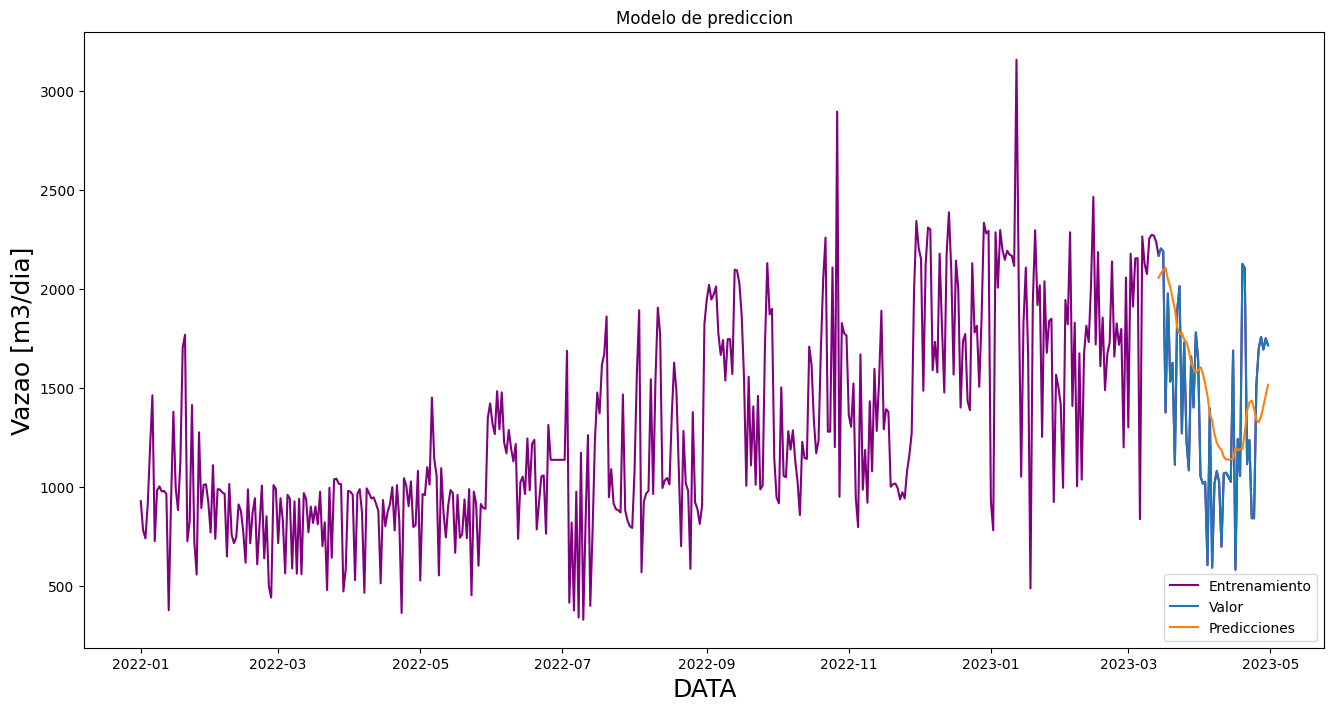

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['DATA']= predictions

plt.figure(figsize=(16,8))
plt.title('Modelo de prediccion')
plt.xlabel('DATA', fontsize=18)
plt.ylabel('Vazao [m3/dia]', fontsize=18)
plt.plot(data['vazao'],color="purple")
plt.plot(valid[['vazao','DATA']])
plt.legend(['Entrenamiento','Valor','Predicciones'],loc='lower right')
plt.show()
